<a href="https://colab.research.google.com/github/dsklnr/dsklnr/blob/main/ML_Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Libraries

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

### Section 2.1 (Animal Control/Shelter Data)

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import shelter_data.csv
os.chdir('/content/drive/My Drive/')
shelter_df = pd.read_csv('shelter_data.csv')
shelter_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
# Check for missing values
shelter_df.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [5]:
# Fill missing values with 'Unknown'
shelter_df.fillna('Unknown', inplace=True)

In [6]:
# Convert 'DateTime' to datetime format
shelter_df['DateTime'] = pd.to_datetime(shelter_df['DateTime'])

# Extract categorical columns
categorical_cols = ['Name', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']

# Perform one-hot encoding for categorical columns
shelter_df = pd.get_dummies(shelter_df, columns=categorical_cols, drop_first=True)

shelter_df.head()

,AnimalID,DateTime,OutcomeType,Name_ Mario,Name_'Stache,Name_007,Name_3Buster,Name_Aaron,Name_Aaron Elvis,Name_Abbadon,...,Color_White/Yellow,Color_White/Yellow Brindle,Color_Yellow,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/Tan,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow
0,A671945,2014-02-12 18:22:00,Return_to_owner,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A656520,2013-10-13 12:44:00,Euthanasia,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,A686464,2015-01-31 12:28:00,Adoption,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A683430,2014-07-11 19:09:00,Transfer,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,A667013,2013-11-15 12:52:00,Transfer,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Set dependent and independent variables
y_shelter = shelter_df['OutcomeType']
X_shelter = shelter_df.drop(columns=['OutcomeType', 'AnimalID', 'DateTime'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_shelter, y_shelter, test_size=0.1, random_state=42)

In [8]:
# Initialize the decision tree classifier
shelter_tree_clf = DecisionTreeClassifier(max_depth=3)

# Train the decision tree classifier
shelter_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
# Predict on the test set
y_pred = shelter_tree_clf.predict(X_test)

# Calculate accuracy
accuracy_original = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_original:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79

Classification Report:
                 precision    recall  f1-score   support

       Adoption       0.66      1.00      0.80      1093
           Died       0.00      0.00      0.00        19
     Euthanasia       1.00      0.61      0.76       150
Return_to_owner       0.00      0.00      0.00       478
       Transfer       1.00      1.00      1.00       933

       accuracy                           0.79      2673
      macro avg       0.53      0.52      0.51      2673
   weighted avg       0.68      0.79      0.72      2673



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


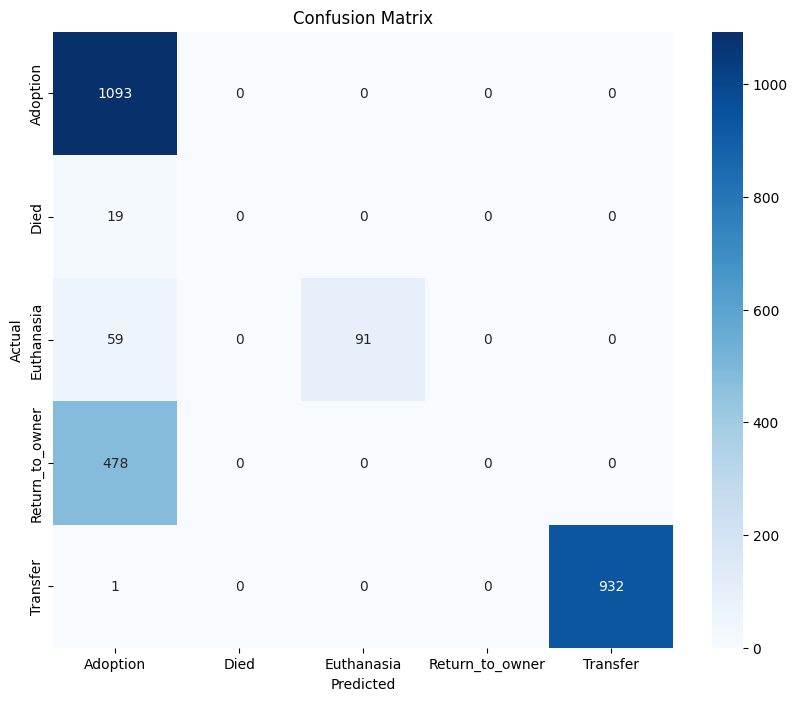

In [10]:
# Calculate confusion matrix
conf_matrix_original = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', xticklabels=shelter_tree_clf.classes_, yticklabels=shelter_tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

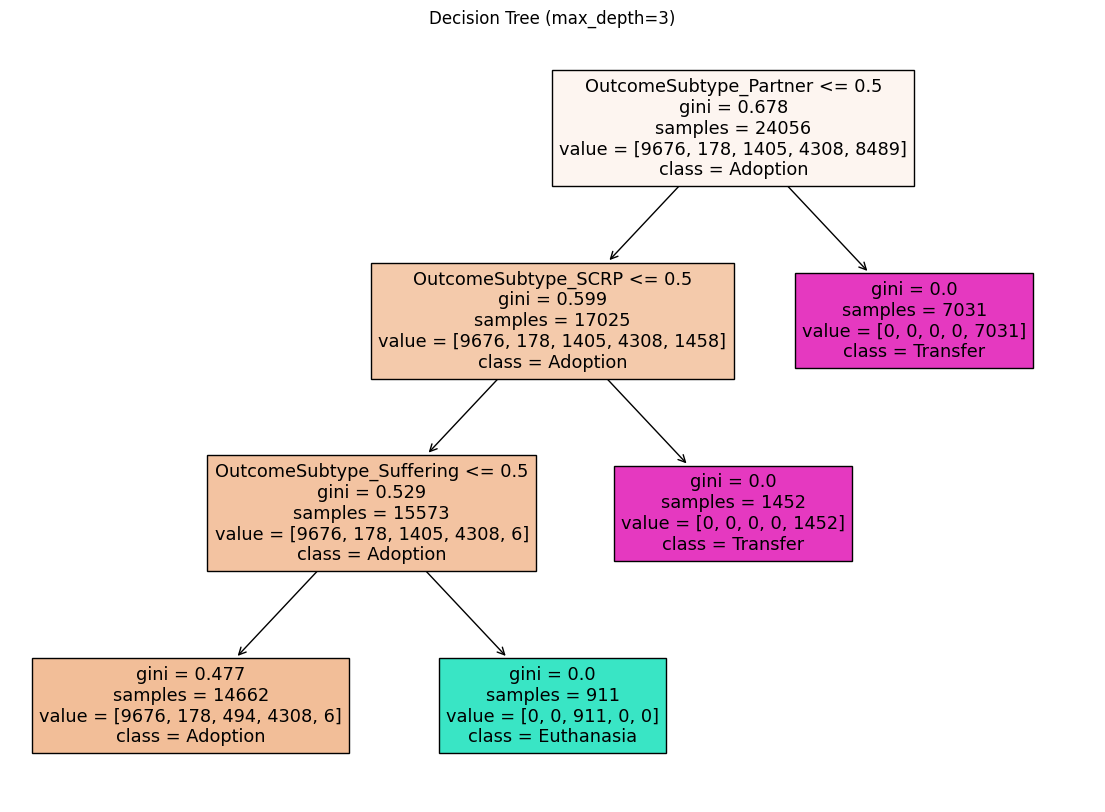

In [11]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(shelter_tree_clf, feature_names=X_shelter.columns, class_names=shelter_tree_clf.classes_, filled=True)
plt.title('Decision Tree (max_depth=3)')
plt.show()

Vary the max_depth in the trees from 1-15

In [34]:
# Define range of decision tree depths
depth_range = range(1, 16)

# Initialize lists to store training and test set accuracies and errors
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_shelter, y_shelter, test_size=0.1, random_state=42)

for depth in depth_range:
    # Initialize decision tree classifier with current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    tree_clf.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    # Calculate accuracy and store errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to arrays
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Append errors to arrays
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

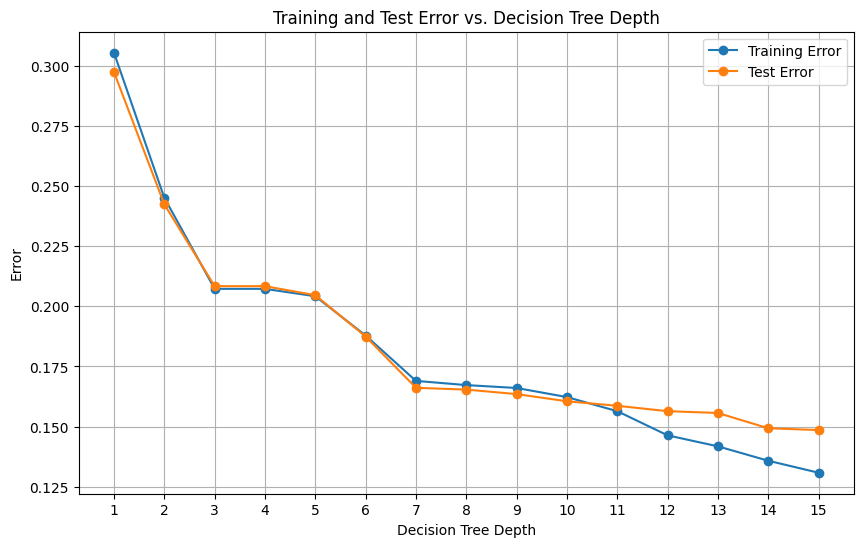

In [35]:
# Plot the decision tree depth vs error
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_errors, marker='o', label='Training Error')
plt.plot(depth_range, test_errors, marker='o', label='Test Error')
plt.title('Training and Test Error vs. Decision Tree Depth')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error')
plt.xticks(depth_range)
plt.legend()
plt.grid(True)
plt.show()

Pruning

In [15]:
# Initialize an empty list to store classifiers
clfs = []

# Define range of ccp_alpha values for pruning
ccp_alphas = np.linspace(0, 0.05, 50)

# Train decision trees for each ccp_alpha
for ccp_alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    tree_clf.fit(X_train, y_train)
    clfs.append(tree_clf)


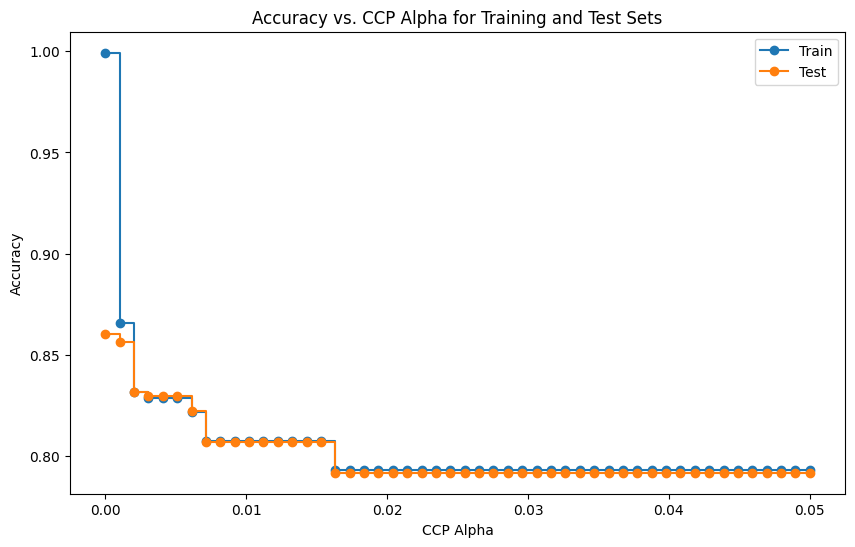

Best CCP Alpha: 0.0


In [16]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot accuracy vs. alpha for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel('CCP Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. CCP Alpha for Training and Test Sets')
plt.legend()
plt.show()

# Select the best model based on test set performance
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_ccp_alpha = ccp_alphas[np.argmax(test_scores)]
best_tree_clf = clfs[np.argmax(test_scores)]

# Print the best CCP Alpha
print(f'Best CCP Alpha: {best_ccp_alpha}')

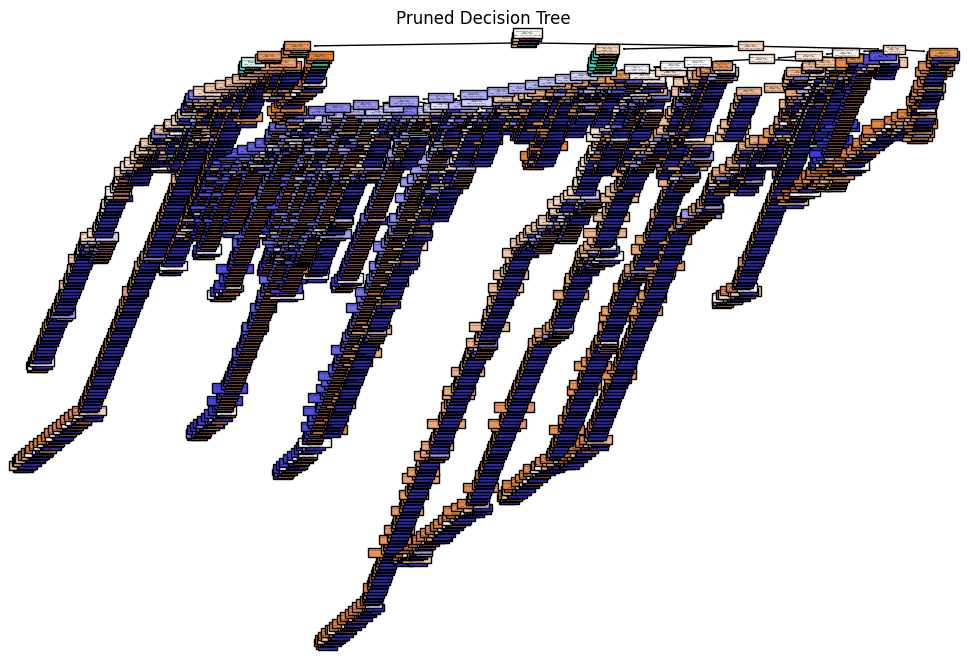

In [17]:
# Plot the best pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree_clf, filled=True, feature_names=X_shelter.columns, class_names=best_tree_clf.classes_)
plt.title('Pruned Decision Tree')
plt.show()

Plot a pruned tree with a ccp_alpha of 0.0007

In [18]:
# Initialize decision tree classifier with mean ccp_alpha
tree_clf = DecisionTreeClassifier(ccp_alpha=0.0007, random_state=42)
tree_clf.fit(X_train, y_train)

# Calculate accuracy on test set
y_pred = tree_clf.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred)

print(f"Accuracy Original Tree: {accuracy_original:.2f}")
print(f'Accuracy Pruned Tree: {accuracy_pruned:.4f}')

Accuracy Original Tree: 0.79
Accuracy Pruned Tree: 0.8586


Pruned Accuracy vs Unpruned Accuracy

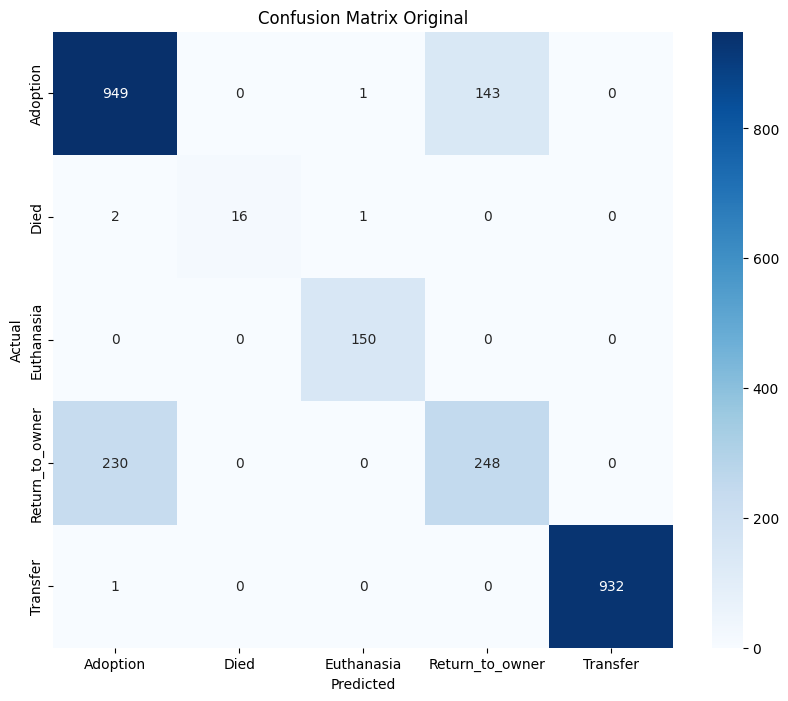

In [21]:
# Calculate confusion matrix
conf_matrix_original = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', xticklabels=shelter_tree_clf.classes_, yticklabels=shelter_tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Original')
plt.show()

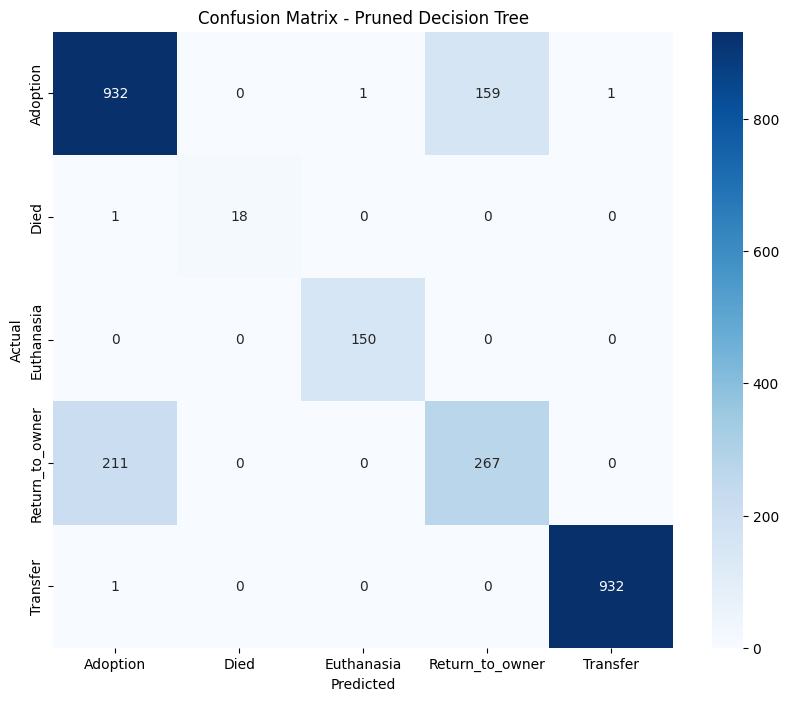

In [22]:
# Predictions on test set
y_pred_pruned = best_tree_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_pruned, annot=True, fmt='d', cmap='Blues', xticklabels=best_tree_clf.classes_, yticklabels=best_tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Pruned Decision Tree')
plt.show()

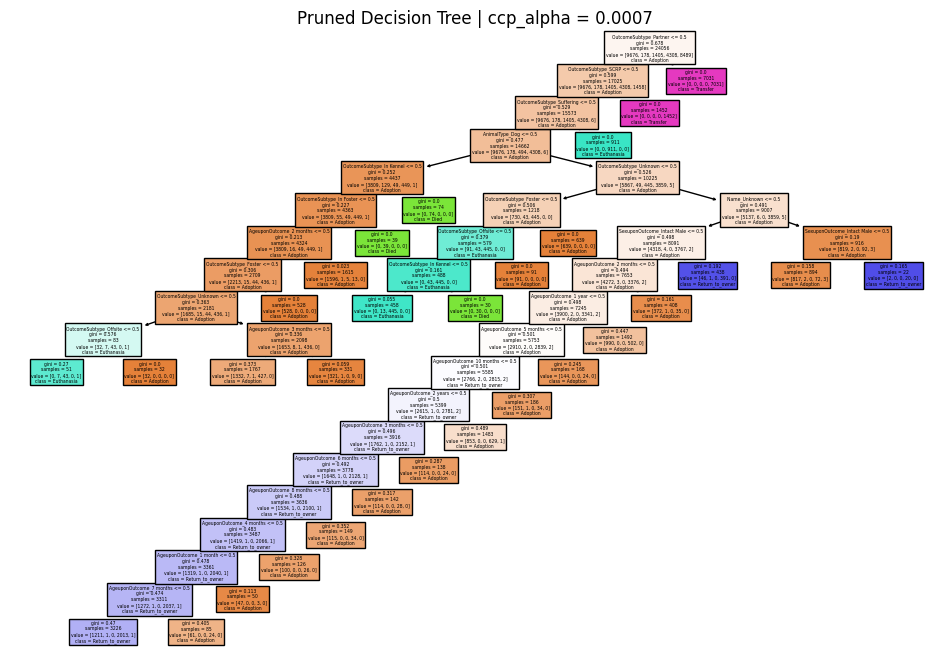

In [23]:
# Plot pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=X_shelter.columns, class_names=tree_clf.classes_)
plt.title('Pruned Decision Tree | ccp_alpha = 0.0007')
plt.show()

### Section 2.2 (Text Data)

In [64]:
# Import text_data.csv
os.chdir('/content/drive/My Drive/')
text_df = pd.read_csv('text_data.csv')
text_df.head()

,Unnamed: 0,meta_author,meta_title,000,10,11,13,136,13th,1648,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,0,hamilton,general introduction for the independent journ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,1,jay,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [25]:
# Extract categorical columns
#categorical_cols = ['meta_author']

# Perform one-hot encoding for categorical columns
#text_df = pd.get_dummies(text_df, columns=categorical_cols, drop_first=True)

#text_df.head()

,Unnamed: 0,meta_title,000,10,11,13,136,13th,1648,1683,...,york,young,yourselves,zaleucus,zeal,zealand,zealous,meta_author_jay,meta_author_madison,meta_author_madison with hamilton
0,0,general introduction for the independent journ...,0,0,0,0,0,0,0,0,...,1,0,0,0,3,0,0,False,False,False
1,1,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,True,False,False
2,2,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,True,False,False
3,3,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,True,False,False
4,4,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,True,False,False


In [65]:
# Set dependent and independent variables
y_text = text_df['meta_title']
X_text = text_df.drop(columns=['meta_title', 'Unnamed: 0', 'meta_author'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y_text, test_size=0.1, random_state=42)

In [78]:
# Initialize the decision tree classifier
text_tree_clf = DecisionTreeClassifier(max_depth=3)

# Train the decision tree classifier
text_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
# Predictions on training and test sets
y_train_pred = text_tree_clf.predict(X_train)
y_test_pred = text_tree_clf.predict(X_test)

# Calculate accuracy
accuracy_original = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.11
Test Accuracy: 0.00

Classification Report:
                                                                                                                                                       precision    recall  f1-score   support

                                   advantage of the union in respect to economy in government for the independent journal wednesday november 28 1787        0.00      0.00      0.00       1.0
       certain general and miscellaneous objections to the constitution considered and answered from mclean s edition new york wednesday may 28 1788        0.00      0.00      0.00       0.0
                                                                           general introduction for the independent journal saturday october 27 1787        0.00      0.00      0.00       1.0
                                                                        the judiciary continued from mclean s edition new york wednesday may 28 1788        0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Create decision trees with max_depth from 1 to 15

In [68]:
# Define range of decision tree depths
depth_range = range(1, 16)

# Initialize lists to store training and test set accuracies and errors
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

# Split data into train and test sets once
X_train, X_test, y_train, y_test = train_test_split(X_text, y_text, test_size=0.1, random_state=42)

for depth in depth_range:
    # Initialize decision tree classifier with current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    tree_clf.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    # Calculate accuracy and store errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append errors to arrays
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

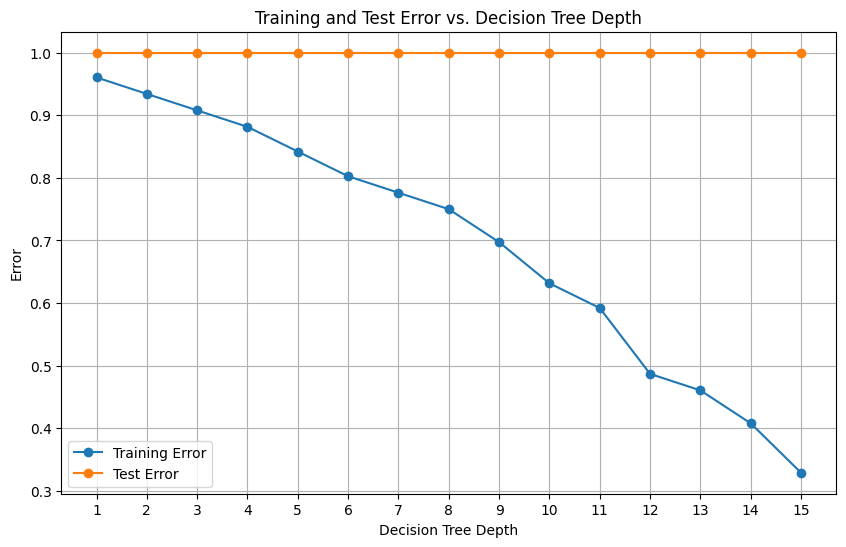

In [69]:
# Plot the decision tree depth vs error
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_errors, marker='o', label='Training Error')
plt.plot(depth_range, test_errors, marker='o', label='Test Error')
plt.title('Training and Test Error vs. Decision Tree Depth')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error')
plt.xticks(depth_range)
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Find the best train error and corresponding test error
best_train_error = min(train_errors)
best_index = train_errors.index(best_train_error)
corresponding_test_error = test_errors[best_index]

print(f"Best train error: {best_train_error}")
print(f"Corresponding test error: {corresponding_test_error}")

Best train error: 0.32894736842105265
Corresponding test error: 1.0


Use PCA to select important words from the dataset

In [71]:
# Define range of decision tree depths
depth_range = range(1, 16)

# Initialize lists to store training and test set accuracies and errors
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

# Define the number of principal components to keep
# 85 is the largest value we can use
n_components = 85

# Initialize the PCA
pca = PCA(n_components=n_components)

# Fit and transform the data
X_reduced = pca.fit_transform(X_text)

# Split data into train and test sets once
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_text, test_size=0.1, random_state=42)

for depth in depth_range:
    # Initialize decision tree classifier with current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    tree_clf.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    # Calculate accuracy and store errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to arrays
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Append errors to arrays
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

print(f"Reduced from {X_text.shape[1]} to {X_reduced.shape[1]} features using PCA")

Reduced from 8560 to 85 features using PCA


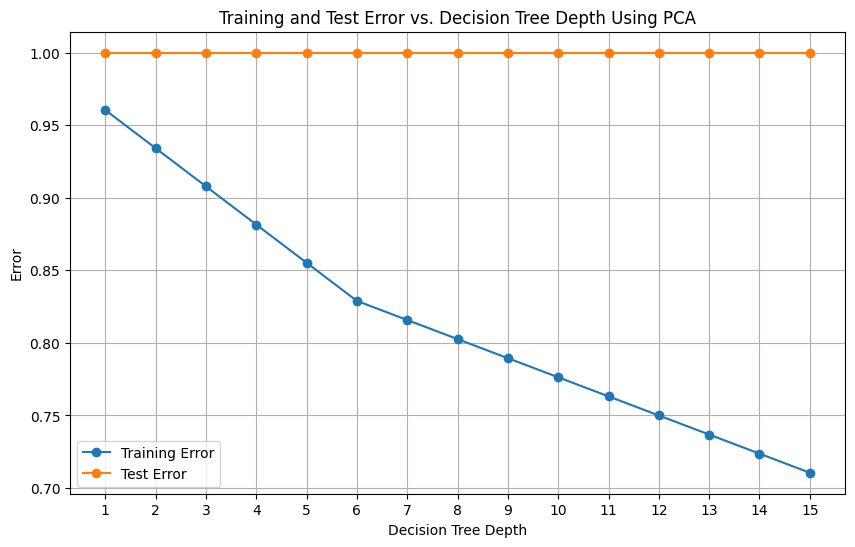

In [72]:
# Plot the decision tree depth vs error
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_errors, marker='o', label='Training Error')
plt.plot(depth_range, test_errors, marker='o', label='Test Error')
plt.title('Training and Test Error vs. Decision Tree Depth Using PCA')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error')
plt.xticks(depth_range)
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Find the best train error and corresponding test error
best_train_error = min(train_errors)
best_index = train_errors.index(best_train_error)
corresponding_test_error = test_errors[best_index]

print(f"Best train error: {best_train_error}")
print(f"Corresponding test error: {corresponding_test_error}")

Best train error: 0.7105263157894737
Corresponding test error: 1.0


Only inlcude words that appear more than 100 times

In [74]:
# Define range of decision tree depths
depth_range = range(1, 16)

# Initialize lists to store training and test set accuracies and errors
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

# Filter columns based on sum
# Calculate the sum of each column
column_sums = np.sum(X_text, axis=0)

# Get the indices of columns where the sum is greater than 100
selected_columns = np.where(column_sums > 100)[0]

# Select the corresponding columns from X_text
X_filtered = X_text.iloc[:, selected_columns]

# Split data into train and test sets once
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_text, test_size=0.1, random_state=42)

for depth in depth_range:
    # Initialize decision tree classifier with current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    tree_clf.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    # Calculate accuracy and store errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to arrays
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Append errors to arrays
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

# Display final output for verification
print(f"Reduced from {X_text.shape[1]} to {X_filtered.shape[1]} features based on sum > 100")


Reduced from 8560 to 150 features based on sum > 100


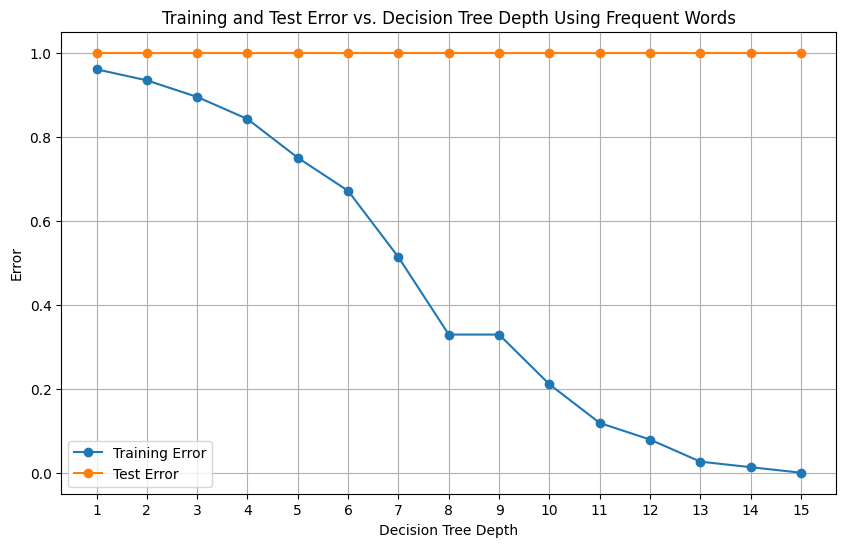

In [75]:
# Plot the decision tree depth vs error
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_errors, marker='o', label='Training Error')
plt.plot(depth_range, test_errors, marker='o', label='Test Error')
plt.title('Training and Test Error vs. Decision Tree Depth Using Frequent Words')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error')
plt.xticks(depth_range)
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Find the best train error and corresponding test error
best_train_error = min(train_errors)
best_index = train_errors.index(best_train_error)
corresponding_test_error = test_errors[best_index]

print(f"Best train error: {best_train_error}")
print(f"Corresponding test error: {corresponding_test_error}")

Best train error: 0.0
Corresponding test error: 1.0


### Section 2.3 (Audio Data)

In [80]:
# Import audio_data.csv
os.chdir('/content/drive/My Drive/')
audio_df = pd.read_csv('audio_data.csv')
audio_df.head()

,Unnamed: 0,filename,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,70Funk.wav,snare,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,1,8oh8 Rim.wav,snare,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,2,8oh8 Tin.wav,snare,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,3,8oh8 Snr.wav,snare,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,4,9oh9 Rim.wav,snare,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


In [81]:
# Check for missing values
audio_df.isnull().sum()

Unnamed: 0     0
filename       0
label_text     0
label          0
0.00 hz        0
              ..
10680.47 hz    0
10766.60 hz    0
10852.73 hz    0
10938.87 hz    0
11025.00 hz    0
Length: 133, dtype: int64

In [82]:
# Extract categorical columns
categorical_cols = ['filename']

# Perform one-hot encoding for categorical columns
audio_df = pd.get_dummies(audio_df, columns=categorical_cols, drop_first=True)

audio_df.head()

,Unnamed: 0,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,516.80 hz,...,filename_Warm Kick.wav,filename_WarmRoom.wav,filename_WeR Borg.wav,filename_Weasel.wav,filename_Wet Weasel.wav,filename_WithClap.wav,filename_Wonk.wav,filename_WoodClif.wav,filename_Woody.wav,filename_Xpando.wav
0,0,snare,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,1.962373,...,False,False,False,False,False,False,False,False,False,False
1,1,snare,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,0.167692,...,False,False,False,False,False,False,False,False,False,False
2,2,snare,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,0.197447,...,False,False,False,False,False,False,False,False,False,False
3,3,snare,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,0.779680,...,False,False,False,False,False,False,False,False,False,False
4,4,snare,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,0.060803,...,False,False,False,False,False,False,False,False,False,False


In [83]:
# Set dependent and independent variables
y_audio = audio_df['label_text']
X_audio = audio_df.drop(columns=['label_text', 'Unnamed: 0'])

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_audio, y_audio, test_size=0.20, random_state=42)

Create a decision tree

In [84]:
# Initialize the decision tree classifier
audio_tree_clf = DecisionTreeClassifier(max_depth=5)

# Train the decision tree classifier
audio_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [85]:
# Predict on the test set
y_pred = audio_tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        kick       1.00      1.00      1.00        22
       snare       1.00      1.00      1.00        21

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



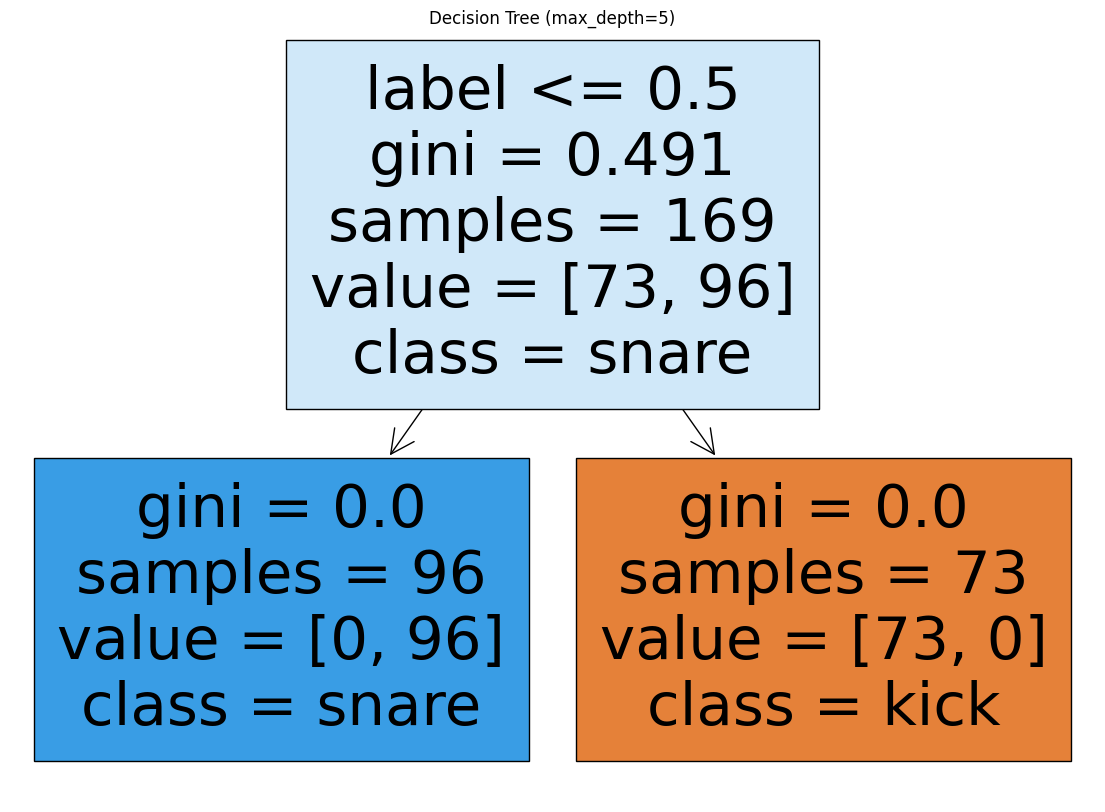

In [86]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(audio_tree_clf, feature_names=X_audio.columns, class_names=audio_tree_clf.classes_, filled=True)
plt.title('Decision Tree (max_depth=5)')
plt.show()

Create decision trees with different max_depths

In [97]:
# Define range of decision tree depths
depth_range = range(1, 16)

# Initialize lists to store training and test set errors
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

for depth in depth_range:
    # Initialize decision tree classifier with current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_audio, y_audio, test_size=0.20, random_state=42)

    # Train the classifier
    tree_clf.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    # Calculate accuracy and store errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Add accuracies to array
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # add errors to array
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

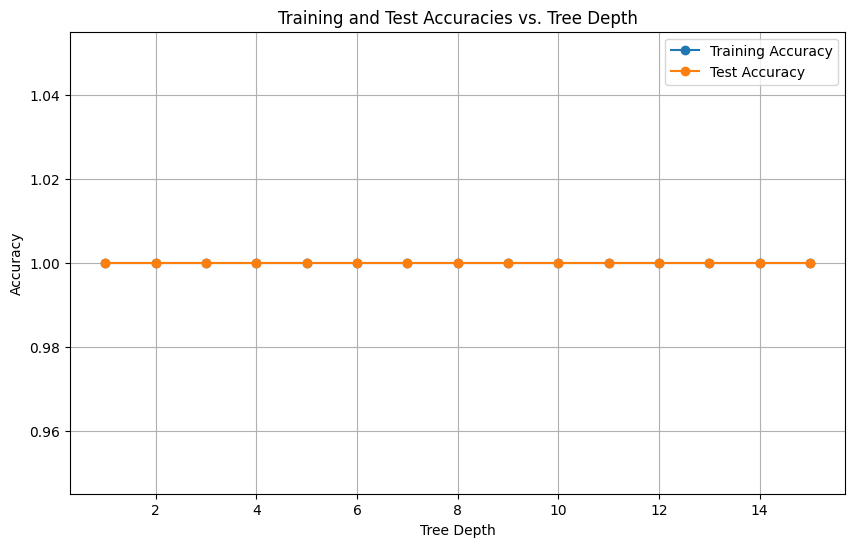

In [98]:
# Plot training and test set accuracies vs. depth
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
# Find the best train error and corresponding test error
best_train_error = min(train_errors)
best_index = train_errors.index(best_train_error)
corresponding_test_error = test_errors[best_index]

print(f"Best train error: {best_train_error}")
print(f"Corresponding test error: {corresponding_test_error}")

Best train error: 0.0
Corresponding test error: 0.0


Set the max_depth to 5

In [100]:
# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Initialize and train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_audio, y_audio, test_size=0.20, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions and calculate accuracies
train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

# Store accuracies in lists
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

# Print accuracies
print("Train accuracy with max_depth = 5: ", train_accuracies)
print("Test accuracy with max_depth = 5: ", test_accuracies)

Train accuracy with max_depth = 5:  [1.0]
Test accuracy with max_depth = 5:  [1.0]


Delete one training example from the audio training set

In [101]:
# Drop one example
X_dropped = X_audio.drop(1)
y= pd.Series(y_audio)
y_drop = y.drop(1)

# split the dataset into train/test based on 20% test
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_drop, test_size=0.20, random_state=42)

In [102]:
# Initialize the decision tree classifier
audio_tree_clf_dropped = DecisionTreeClassifier(max_depth=5)

# Train the decision tree classifier
audio_tree_clf_dropped.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Show decision tree evaluation metrics

In [103]:
# Predict on the test set
y_pred = audio_tree_clf_dropped.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

        kick       1.00      1.00      1.00        22
       snare       1.00      1.00      1.00        21

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



Show the decision tree with a dropped example

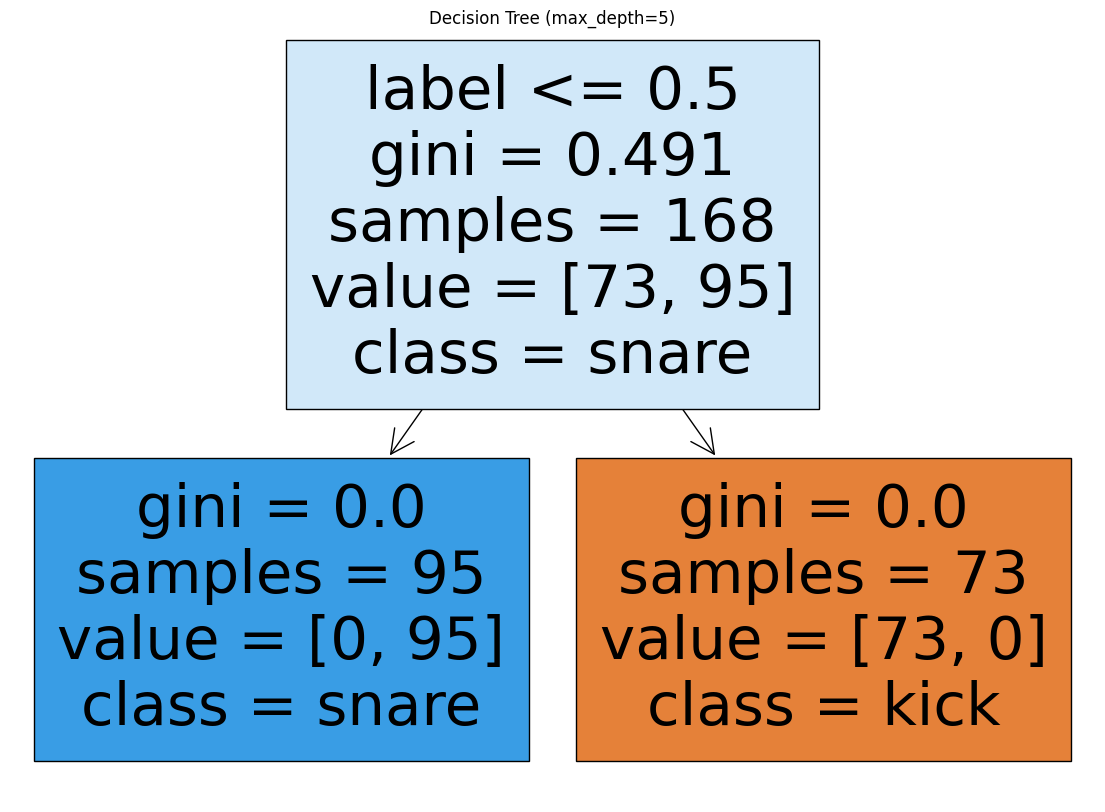

In [104]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(audio_tree_clf_dropped, feature_names=X_audio.columns, class_names=audio_tree_clf.classes_, filled=True)
plt.title('Decision Tree (max_depth=5)')
plt.show()

Create more decisions trees with different max_depth values

In [105]:
# Define range of decision tree depths
depth_range = range(1, 16)

# Initialize lists to store training and test set errors
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

for depth in depth_range:
    # Initialize decision tree classifier with current depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the classifier
    tree_clf.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    # Calculate accuracy and store errors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Add accuracies to array
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # add errors to array
    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

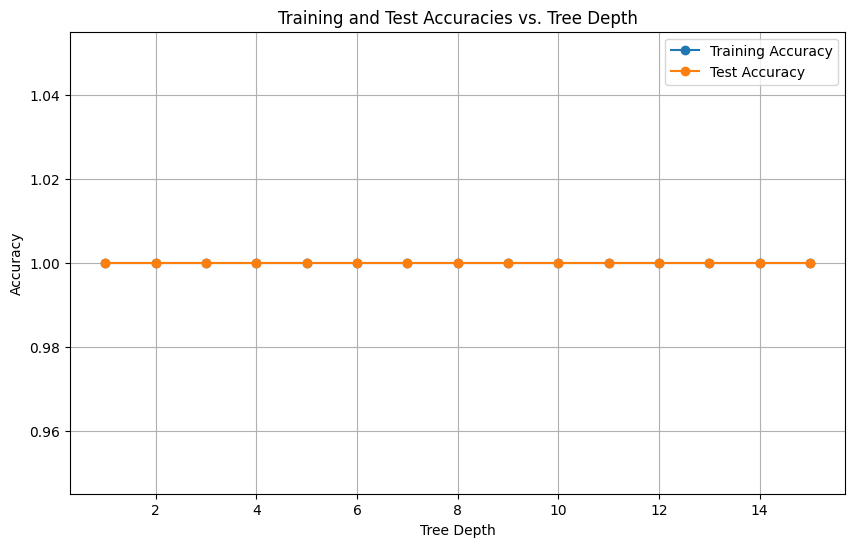

In [106]:
# Plot training and test set accuracies vs. depth
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Find the best train error and corresponding test error
best_train_error = min(train_errors)
best_index = train_errors.index(best_train_error)
corresponding_test_error = test_errors[best_index]

print(f"Best train error: {best_train_error}")
print(f"Corresponding test error: {corresponding_test_error}")

Best train error: 0.0
Corresponding test error: 0.0


### 3. Cross-Validation

In [116]:
# Split into train and test datasets based on a 50/50 split
X_train, X_test, y_train, y_test = train_test_split(X_audio, y_audio, test_size=0.50, random_state=42)

In [117]:
class BadClassifier():
  def __init__(self):
    pd = __import__('pandas')
    self.label_counts = pd.Series()
  def train(self, y_train):
    train_labels = pd.Series(y_train)
    label_counts = train_labels.value_counts(normalize=True)
    self.label_counts = label_counts.sort_index()
  def make_random_predictions(self, X_test):
    pred_labels=[]
    test_labels = pd.Series(y_test)
    test_label_counts = np.random.multinomial(X_test.shape[0],self.label_counts.values)
    for count,label in zip (test_label_counts,self.label_counts.index.values):
      pred_labels = pred_labels + [label for x in range(0,count)]
    np.random.shuffle(pred_labels)
    return pred_labels

Text(0, 0.5, 'Accuracy')

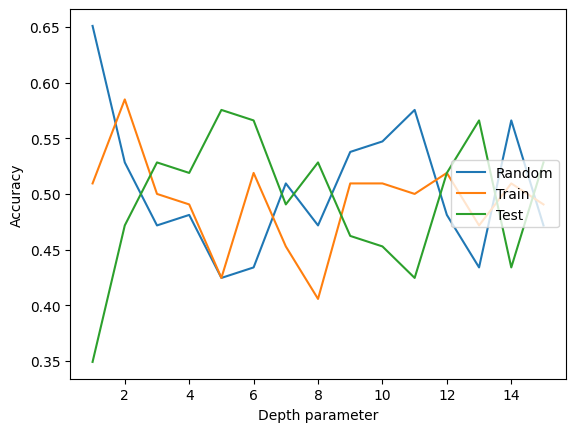

In [120]:
bad = BadClassifier()
accuracy = list()
train_errors = list()
test_errors = list()

for x in range(1,16):
  bad.train(y_train)
  y_pred = bad.make_random_predictions(X_test)

  # Make random predictions for both train and test sets
  y_train_pred = bad.make_random_predictions(X_train)
  y_test_pred = bad.make_random_predictions(X_test)

  # Calculate accuracy and errors
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  accuracy.append(test_accuracy)
  train_errors.append(1 - train_accuracy)
  test_errors.append(1 - test_accuracy)

# plotting
plt.plot(range(1,16),accuracy, label='Random')
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Accuracy')

Repeat using a smaller amount of test data

In [111]:
# Split into train and test datasets based on a 99/1 split
X_train, X_test, y_train, y_test = train_test_split(X_audio, y_audio, test_size=0.01, random_state=42)

Text(0, 0.5, 'Accuracy')

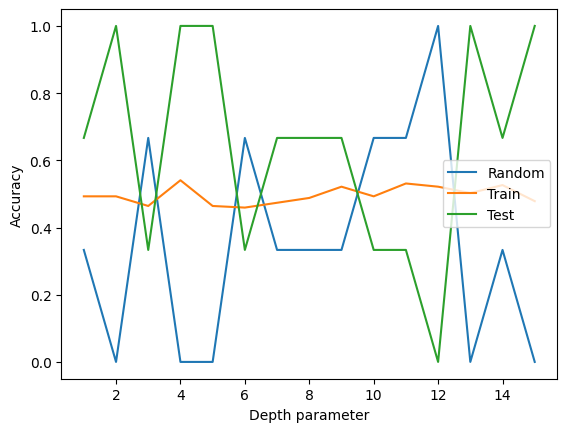

In [113]:
bad = BadClassifier()
accuracy = list()
train_errors = list()
test_errors = list()

for x in range(1,16):
  bad.train(y_train)
  y_pred = bad.make_random_predictions(X_test)

  # Make random predictions for both train and test sets
  y_train_pred = bad.make_random_predictions(X_train)
  y_test_pred = bad.make_random_predictions(X_test)

  # Calculate accuracy and errors
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  accuracy.append(test_accuracy)
  train_errors.append(1 - train_accuracy)
  test_errors.append(1 - test_accuracy)

# plotting
plt.plot(range(1,16),accuracy, label='Random')
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Test')
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Accuracy')